# Individual NN Classification Assignment (Spring 2024)
**Dr. Dave Wanik - University of Connecticut**

* Full Name:Kumar Manav
* Student ID (7 digit number):3010566

---------------------------------------------------------------------------

Each student must complete and submit their own file, but you may work with your group for help. I do not want to see direct copy and pasted code otherwise you will get a zero.

1. Read the data dictionary and description from here:

* https://oehha.ca.gov/media/downloads/calenviroscreen/document/calenviroscreen40resultsdatadictionaryf2021.zip

 Download the data using gdown, read the Excel file using pandas, print the first 10 rows using df.head() and use df.info() to examine the data types and missing values.

2. Simplify the raw dataframe so that you only keep the columns you need. The `X` variable will be the following columns: `Population`, `Ozone` through `Solid Waste Pctl`, and `Asthma` through `Linguistic Isolation Pctl`. The `y` variable will be `Poverty`. Examine the quality of each column and use your judgement about dropping rows or imputing missing values. Add text cells and lots of comments so we can understand your logic/justification!

3. Recode the target variable to a 1 if greater than the mean value of poverty, otherwise make it a 0. Use this recoded variable as the target variable! Now it is a classification problem.

4. Make two interesting plots or tables and a description of why you made the table and what you see.

5. Do an 90/10 split for X_train, X_test, y_train, y_test where the random seed is equal to your 7 digit studentID number.

6. Use the StandardScaler() on train and apply to test partition. Do not scale the target variable!

7. Build a model using the Sequential API (like we do in class) with at least 2 dense layers with the relu activation function, and with dropout in between each dense layer (use a number between 0.1 and 0.5). Compile the model using an appropriate optimizer. Use early stopping with patience of at least 10 and restore the best weights once the model converges. You can choose whatever batch size you would like to.

8. Fit the model for 100000 epochs with a batch size of your choice, using X_test and y_test as the validation data. **Don’t forget the early stopping callback!**

9. Evaluate the model using learning curves, error metrics and confusion matrices for each partition (like we do in class). You should largely be able to copy and paste this from class notebooks. Add a few bullet points about what you see (did your model learn nice and gently?  If you don't have text cells here, you will lose points.

10. Calculate what a baseline prediction would be for the train and test partitions (a mean only model). Did your model do better than the baseline predictions? If so, you have a useful model!

# Read Data and Import Modules

In [ ]:
# import modules
# for general data analysis/plotting
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# for data prep
from sklearn.model_selection import train_test_split

# neural net modules
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

In [ ]:
# https://drive.google.com/file/d/1_8vmQwSZ02ZOMw_IPHY5OWkwpXQLVW2E/view?usp=sharing
!gdown --id 1_8vmQwSZ02ZOMw_IPHY5OWkwpXQLVW2E # ID for Environmental Health data! look up!
df_CalEnviroScreen = pd.read_excel('CalEnviroScreen.xlsx')

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1_8vmQwSZ02ZOMw_IPHY5OWkwpXQLVW2E
To: /content/CalEnviroScreen.xlsx
100% 6.19M/6.19M [00:00<00:00, 182MB/s]


In [ ]:
# read data
df = pd.read_excel('CalEnviroScreen.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8035 entries, 0 to 8034
Data columns (total 57 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Census Tract                                      8035 non-null   int64  
 1   Total Population                                  8035 non-null   int64  
 2   California County                                 8035 non-null   object 
 3   ZIP                                               8035 non-null   int64  
 4   Nearby City 
(to help approximate location only)  8035 non-null   object 
 5   Longitude                                         8035 non-null   float64
 6   Latitude                                          8035 non-null   float64
 7   CES 3.0 Score                                     7929 non-null   float64
 8    CES 3.0 Percentile                               7929 non-null   float64
 9   CES 3.0 
Percentile

In [ ]:
df.head(10)


,Census Tract,Total Population,California County,ZIP,Nearby City \n(to help approximate location only),Longitude,Latitude,CES 3.0 Score,CES 3.0 Percentile,CES 3.0 \nPercentile Range,...,Linguistic Isolation Pctl,Poverty,Poverty Pctl,Unemployment,Unemployment Pctl,Housing Burden,Housing Burden Pctl,Pop. Char.,Pop. Char. Score,Pop. Char. Pctl
0,6019001100,3174,Fresno,93706,Fresno,-119.781696,36.709695,94.090246,100.000000,95-100% (highest scores),...,77.509665,76.3,97.121307,17.6,91.724838,26.0,79.398324,92.120494,9.553509,99.697314
1,6071001600,6133,San Bernardino,91761,Ontario,-117.618013,34.057780,90.677839,99.987388,95-100% (highest scores),...,96.253833,72.5,94.632307,12.3,71.823836,34.1,93.754760,87.436849,9.067784,98.108210
2,6019000200,3167,Fresno,93706,Fresno,-119.805504,36.735491,85.970036,99.974776,95-100% (highest scores),...,78.389548,86.8,99.560025,16.1,87.980708,40.1,97.854785,94.581328,9.808714,99.987388
3,6077000801,6692,San Joaquin,95203,Stockton,-121.314524,37.940517,82.491521,99.962164,95-100% (highest scores),...,75.136648,61.3,85.568825,19.6,94.973981,21.1,63.544047,86.701266,8.991499,97.717241
4,6019001500,2206,Fresno,93725,Fresno,-119.717843,36.681600,82.030814,99.949552,95-100% (highest scores),...,73.723504,66.4,90.232558,18.6,93.654017,28.1,83.980706,80.075199,8.304332,92.760752
5,6037204920,2598,Los Angeles,90023,Los Angeles,-118.197497,34.017500,80.726872,99.936940,95-100% (highest scores),...,89.148114,66.4,90.232558,11.6,67.419723,22.0,67.034780,82.361214,8.541407,94.892168
6,6077000300,2396,San Joaquin,95203,Stockton,-121.302072,37.952421,80.178935,99.924328,95-100% (highest scores),...,92.401013,76.2,97.033312,14.4,82.002792,24.3,74.727088,91.940147,9.534806,99.646866
7,6019001000,4106,Fresno,93706,Fresno,-119.804314,36.697751,80.134819,99.911716,95-100% (highest scores),...,76.576456,74.5,95.901948,20.0,95.494352,31.8,90.720995,93.793697,9.727032,99.911716
8,6037206050,2146,Los Angeles,90023,Los Angeles,-118.224453,34.029904,79.025293,99.899105,95-100% (highest scores),...,97.120384,75.7,96.643620,28.5,99.505013,31.7,90.555979,80.249569,8.322415,92.962543
9,6019000400,6343,Fresno,93721,Fresno,-119.776209,36.727656,78.529850,99.886493,95-100% (highest scores),...,71.350487,83.4,99.082338,23.5,98.273893,23.2,71.337903,83.195409,8.627918,95.711943


In [ ]:
#Update df to only include needed columns
df = df[['Total Population', 'Ozone', 'Solid Waste Pctl', 'Asthma',
       'Asthma Pctl', 'Low Birth Weight', 'Low Birth Weight Pctl',
       'Cardiovascular Disease', 'Cardiovascular Disease Pctl', 'Education',
       'Education Pctl', 'Linguistic Isolation', 'Linguistic Isolation Pctl', 'Poverty']]


In [ ]:
df.info()#verify

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8035 entries, 0 to 8034
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Total Population             8035 non-null   int64  
 1   Ozone                        8035 non-null   float64
 2   Solid Waste Pctl             8035 non-null   float64
 3   Asthma                       8035 non-null   float64
 4   Asthma Pctl                  8035 non-null   float64
 5   Low Birth Weight             7813 non-null   float64
 6   Low Birth Weight Pctl        7813 non-null   float64
 7   Cardiovascular Disease       8035 non-null   float64
 8   Cardiovascular Disease Pctl  8035 non-null   float64
 9   Education                    7939 non-null   float64
 10  Education Pctl               7939 non-null   float64
 11  Linguistic Isolation         7793 non-null   float64
 12  Linguistic Isolation Pctl    7793 non-null   float64
 13  Poverty           

It is evident that there are quite a few number of rows that are missing from important columns. we can try a combination of dropping and imputing columns based on available data dictionary

In [ ]:
#low birth weight percent and  percentile

df['Low Birth Weight'].isnull().sum()


222

In [ ]:
df['Low Birth Weight Pctl'].isnull().sum()

222

In [ ]:
df['Low Birth Weight'].describe()#a look at stats

count    7813.000000
mean        4.976329
std         1.551352
min         0.000000
25%         3.950000
50%         4.920000
75%         5.930000
max        14.890000
Name: Low Birth Weight, dtype: float64

In [ ]:
#There is a wide range for birth rate, it would be better to remove those rows rather than impute to ensure that target variable is not skewed
# Drop rows with NaN values from multiple columns
df.dropna(subset=['Low Birth Weight', 'Low Birth Weight Pctl'], inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7813 entries, 0 to 8000
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Total Population             7813 non-null   int64  
 1   Ozone                        7813 non-null   float64
 2   Solid Waste Pctl             7813 non-null   float64
 3   Asthma                       7813 non-null   float64
 4   Asthma Pctl                  7813 non-null   float64
 5   Low Birth Weight             7813 non-null   float64
 6   Low Birth Weight Pctl        7813 non-null   float64
 7   Cardiovascular Disease       7813 non-null   float64
 8   Cardiovascular Disease Pctl  7813 non-null   float64
 9   Education                    7787 non-null   float64
 10  Education Pctl               7787 non-null   float64
 11  Linguistic Isolation         7694 non-null   float64
 12  Linguistic Isolation Pctl    7694 non-null   float64
 13  Poverty           

<ipython-input-10-6b43ace075ed>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['Low Birth Weight', 'Low Birth Weight Pctl'], inplace=True)


In [ ]:
df['Education'].isnull().sum()

26

In [ ]:
df['Education Pctl'].isnull().sum()

26

In [ ]:
#as there are very less number of missing columns we can impute by mean and median
df['Education'].fillna(df['Education'].mean(), inplace=True)
df['Education Pctl'].fillna(df['Education Pctl'].median(), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7813 entries, 0 to 8000
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Total Population             7813 non-null   int64  
 1   Ozone                        7813 non-null   float64
 2   Solid Waste Pctl             7813 non-null   float64
 3   Asthma                       7813 non-null   float64
 4   Asthma Pctl                  7813 non-null   float64
 5   Low Birth Weight             7813 non-null   float64
 6   Low Birth Weight Pctl        7813 non-null   float64
 7   Cardiovascular Disease       7813 non-null   float64
 8   Cardiovascular Disease Pctl  7813 non-null   float64
 9   Education                    7813 non-null   float64
 10  Education Pctl               7813 non-null   float64
 11  Linguistic Isolation         7694 non-null   float64
 12  Linguistic Isolation Pctl    7694 non-null   float64
 13  Poverty           

<ipython-input-13-85c52f8a5c9d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Education'].fillna(df['Education'].mean(), inplace=True)
<ipython-input-13-85c52f8a5c9d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Education Pctl'].fillna(df['Education Pctl'].median(), inplace=True)


In [ ]:
df['Linguistic Isolation'].isnull().sum()

119

In [ ]:
df['Linguistic Isolation Pctl'].isnull().sum()

119

In [ ]:
df['Poverty'].isnull().sum()

5

In [ ]:
#as there are very less number of missing columns we can impute by mean and median
df['Poverty'].fillna(df['Poverty'].median(), inplace=True)
df['Linguistic Isolation'].fillna(df['Linguistic Isolation'].mean(), inplace=True)
df['Linguistic Isolation Pctl'].fillna(df['Linguistic Isolation Pctl'].median(), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7813 entries, 0 to 8000
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Total Population             7813 non-null   int64  
 1   Ozone                        7813 non-null   float64
 2   Solid Waste Pctl             7813 non-null   float64
 3   Asthma                       7813 non-null   float64
 4   Asthma Pctl                  7813 non-null   float64
 5   Low Birth Weight             7813 non-null   float64
 6   Low Birth Weight Pctl        7813 non-null   float64
 7   Cardiovascular Disease       7813 non-null   float64
 8   Cardiovascular Disease Pctl  7813 non-null   float64
 9   Education                    7813 non-null   float64
 10  Education Pctl               7813 non-null   float64
 11  Linguistic Isolation         7813 non-null   float64
 12  Linguistic Isolation Pctl    7813 non-null   float64
 13  Poverty           

In [ ]:
df.isnull().sum().sum()# there are no missing values

0

In [ ]:
#recode target variable
mean_poverty= df['Poverty'].mean()
df["poverty_recode"]= (df['Poverty'] > mean_poverty).astype(int)
print(mean_poverty)#verify
df.head(10)

36.377243056444385


,Total Population,Ozone,Solid Waste Pctl,Asthma,Asthma Pctl,Low Birth Weight,Low Birth Weight Pctl,Cardiovascular Disease,Cardiovascular Disease Pctl,Education,Education Pctl,Linguistic Isolation,Linguistic Isolation Pctl,Poverty,poverty_recode
0,3174,0.064889,97.807121,131.64,97.668620,7.44,93.835704,14.13,96.309687,53.3,95.760787,16.2,77.509665,76.3,1
1,6133,0.062163,92.171658,60.66,69.779329,7.04,90.849673,12.94,92.656776,53.3,95.760787,33.4,96.253833,72.5,1
2,3167,0.062163,57.179910,142.12,98.329385,10.16,99.782135,14.96,97.668620,42.3,89.061317,16.7,78.389548,86.8,1
3,6692,0.046178,99.103985,142.17,98.341853,6.23,80.648469,14.72,97.169929,40.8,87.522079,15.3,75.136648,61.3,1
4,2206,0.064889,99.905683,90.48,89.539958,4.50,38.920928,12.82,92.357561,45.1,91.130457,14.7,73.723504,66.4,1
5,2598,0.046178,65.668474,68.74,77.633712,7.35,93.207741,10.40,77.621244,53.1,95.672470,23.7,89.148114,66.4,1
6,2396,0.046178,52.982787,169.56,99.364169,8.36,97.859798,12.70,91.684329,46.0,91.723442,27.1,92.401013,76.2,1
7,4106,0.064889,89.460033,142.28,98.416656,7.83,95.911829,14.96,97.668620,47.4,92.581378,15.8,76.576456,74.5,1
8,2146,0.046178,98.019335,58.03,66.525371,6.71,87.504806,7.24,40.556040,50.4,94.360333,35.7,97.120384,75.7,1
9,6343,0.064889,20.490450,107.80,94.227652,4.79,46.469307,14.75,97.257200,52.5,95.319203,13.7,71.350487,83.4,1


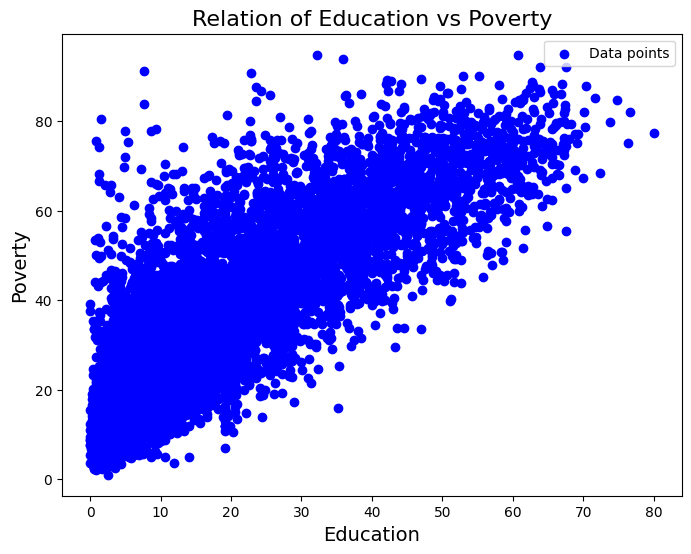

In [ ]:
#exploring relation of poverty to Education
fig, ax = plt.subplots(figsize=(8, 6))


ax.scatter(df['Education'], df['Poverty'], color='blue', label='Data points')
ax.set_xlabel('Education', fontsize=14)
ax.set_ylabel('Poverty', fontsize=14)
ax.set_title('Relation of Education vs Poverty', fontsize=16)
ax.legend()
plt.show()

low values of education has more people which starts to become less dense when education score is more than 50. This could mean less access to high earning opportunities due to lack of education beyond a certain threshold


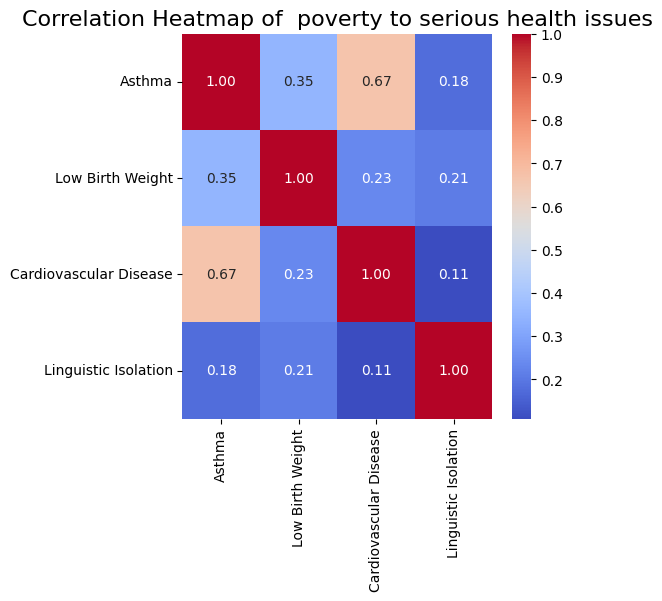

In [ ]:
#exploring effect  of poverty to possible health conditions
import seaborn as sns

# Specify the columns for the heatmap
columns = ['Asthma', 'Low Birth Weight', 'Cardiovascular Disease', 'Linguistic Isolation']

# Calculate the correlation matrix
correlation_matrix = df[columns].corr()

# Create the heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of  poverty to serious health issues', fontsize=16)
plt.show()


In [ ]:
# split into X and Y
Y = df['poverty_recode']
X = df.drop(['poverty_recode'], axis=1)
print(X.shape)
print(Y.shape)

(7813, 14)
(7813,)


In [ ]:
X= np.array(X)#convert into array for better model performance
Y= np.array(Y)

In [ ]:
x_train,x_test,y_train,y_test= train_test_split(X,Y,test_size=0.1,random_state=3010566)#split data set and check shape. Student Id= 3010566
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(7031, 14) (782, 14) (7031,) (782,)


In [ ]:
#Standard scaler to ensure equal contribution of factors not biased on units or scales
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
x_train = min_max_scaler.fit_transform(x_train)
x_test = min_max_scaler.transform(x_test)

In [ ]:
#model building with dense layers and two dropout
model = Sequential()
model.add(Dense(16, input_shape=(x_train.shape[1],), activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                240       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dropout_2 (Dropout)         (None, 8)                 0         
                                                                 
 dense_3 (Dense)             (None, 1)                 9

In [ ]:
# compile the model
model.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
#define early stopping callback with a patience greater than 10 and restore best weights if model converges
es = EarlyStopping(monitor='val_accuracy',
                                   mode='max',
                                   patience=20,
                                   restore_best_weights=True)

#compiling model with appropriate epochs and batch size
history = model.fit(x_train,
                    y_train,
                    validation_data = (x_test, y_test),
                    callbacks=[es],
                    epochs=100000,
                    batch_size=20,
                    validation_split=0.2,
                    shuffle=True,
                    verbose=1)

Epoch 1/100000
352/352 [==============================] - 2s 3ms/step - loss: 0.6183 - accuracy: 0.6663 - val_loss: 0.4522 - val_accuracy: 0.8708
Epoch 2/100000
352/352 [==============================] - 1s 2ms/step - loss: 0.4300 - accuracy: 0.8177 - val_loss: 0.2322 - val_accuracy: 0.9169
Epoch 3/100000
352/352 [==============================] - 1s 2ms/step - loss: 0.3044 - accuracy: 0.8874 - val_loss: 0.1576 - val_accuracy: 0.9540
Epoch 4/100000
352/352 [==============================] - 1s 2ms/step - loss: 0.2309 - accuracy: 0.9185 - val_loss: 0.1235 - val_accuracy: 0.9488
Epoch 5/100000
352/352 [==============================] - 1s 2ms/step - loss: 0.1827 - accuracy: 0.9357 - val_loss: 0.0796 - val_accuracy: 0.9719
Epoch 6/100000
352/352 [==============================] - 1s 4ms/step - loss: 0.1486 - accuracy: 0.9455 - val_loss: 0.0693 - val_accuracy: 0.9757
Epoch 7/100000
352/352 [==============================] - 1s 3ms/step - loss: 0.1307 - accuracy: 0.9555 - val_loss: 0.0525 -

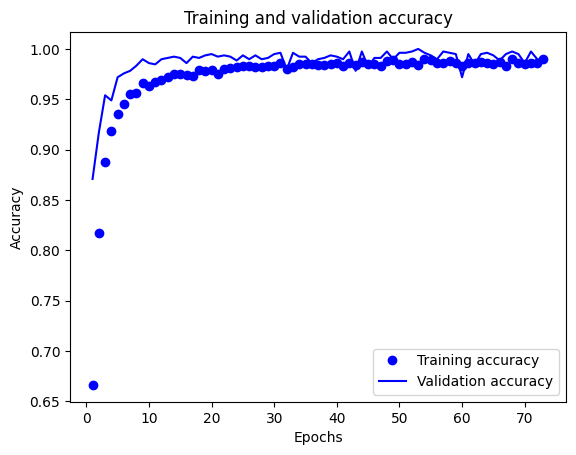

In [ ]:
# learning curve
import matplotlib.pyplot as plt

# accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# loss
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
np.max(val_acc)

1.0

In [ ]:
# Error Metrics

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def print_metrics(y_true, y_pred, title):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(title)
    print(f'Accuracy: {accuracy:.2f}')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1-score: {f1:.2f}')
    print()

# Predictions
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

# Thresholding predictions
threshold = 0.5
y_train_pred_binary = (y_train_pred > threshold).astype(int)
y_test_pred_binary = (y_test_pred > threshold).astype(int)

# Print metrics
print_metrics(y_train, y_train_pred_binary, 'Train Metrics:')
print_metrics(y_test, y_test_pred_binary, 'Test Metrics:')

25/25 [==============================] - 0s 2ms/step
Train Metrics:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-score: 1.00

Test Metrics:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-score: 1.00



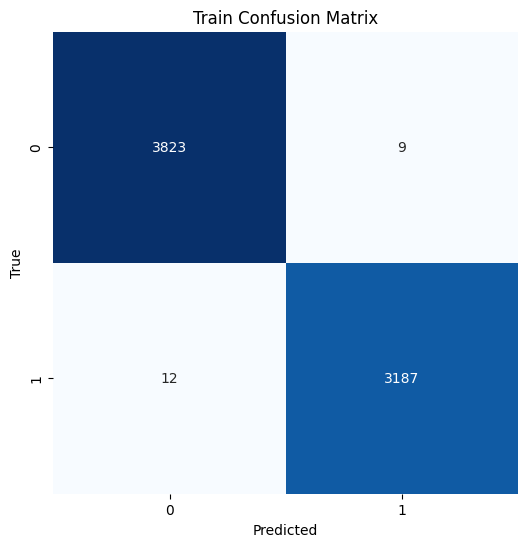

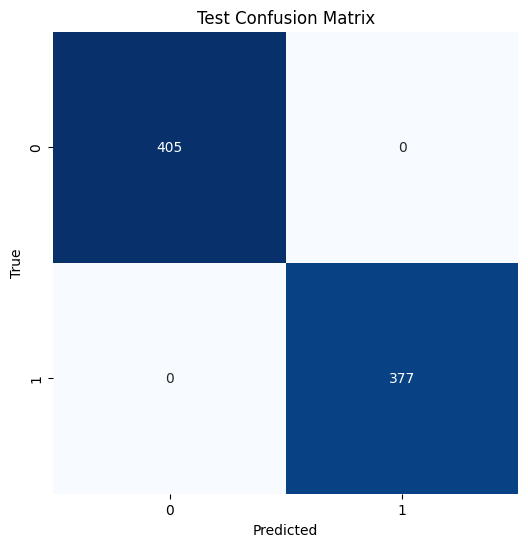

In [ ]:
# Confusion Matrices
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

plot_confusion_matrix(y_train, y_train_pred_binary, 'Train Confusion Matrix')
plot_confusion_matrix(y_test, y_test_pred_binary, 'Test Confusion Matrix')


##Takeaways
 The models perform well on the training and testing data. The cureve shows a slight learning curve before flattening out. Most of the data in the confusion matrix is in the diagonal. This raises concerns of overfitting , data leakage and data imbalance.


 We have used a validation set which also performs well. We have taken measures like using standard scaler and adding dropout for all layers. We have also kept shuffle to ensure that data is continously shuffled. While looking at the preprocessing steps, we have not removed poverty column from training set,it could be a huge contributing factor. I tried an alternate model by removing poverty model but got accuracy at 100%. I have thus gone ahead with the current model setup

In [ ]:
# Baseline prediction
mean_prediction = np.mean(y_train)
y_train_baseline = np.full_like(y_train, mean_prediction)
y_test_baseline = np.full_like(y_test, mean_prediction)

# Baseline metrics
print_metrics(y_train, y_train_baseline, 'Train Baseline Metrics:')
print_metrics(y_test, y_test_baseline, 'Test Baseline Metrics:')

Train Baseline Metrics:
Accuracy: 0.55
Precision: 0.00
Recall: 0.00
F1-score: 0.00

Test Baseline Metrics:
Accuracy: 0.52
Precision: 0.00
Recall: 0.00
F1-score: 0.00



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


It is evident that the performance of baseline models are much more poorer than the deep learning model. Hence the deep learning models proved better in prediction.